# Text Analysis

This notebook applies text analysis techniques to a dataset of tweets to `@apple`, exploring sentiment and word frequencies.

## Data preparation

### Library imports

In [1]:
import pandas as pd  # Manage datasets
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Sentiment in social media
import seaborn as sns  # Plotting
from nltk.tokenize import word_tokenize  # Split text into words
from nltk.corpus import stopwords  # Lists of unimportant words
from collections import Counter  # Count word frequency
import matplotlib.pyplot as plt  # Visualisation
from wordcloud import WordCloud  # Wordclouds
from pandas.core.common import flatten  # Collapse lists of lists

### Sourcing the data

In [2]:
tweets = pd.read_csv("apple_tweets.csv")

In [3]:
tweets.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,5746452.0,1.090372e+18,1548799817,waltmossberg,It’s true that @Apple likely overpriced the la...,Twitter for iPad,279,NaN,NaN,NaN,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
1,5746452.0,1.090374e+18,1548800328,waltmossberg,@AaronSuplizio @Apple Yes it is.,Twitter for iPad,10,1.090373e+18,2.365419e+07,AaronSuplizio,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
2,5746452.0,1.090382e+18,1548802301,waltmossberg,"@mvigod @Apple As I have said many times here,...",Twitter for iPad,259,1.090381e+18,2.224800e+08,mvigod,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
3,5746452.0,1.090373e+18,1548800242,waltmossberg,I’m not saying that @Apple doesn’t have proble...,Twitter for iPad,270,1.090372e+18,5.746452e+06,waltmossberg,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
4,1175221.0,1.090110e+18,1548737368,digiphile,@DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...,Twitter for iPhone,88,1.090109e+18,1.251786e+09,DaveLeeBBC,...,165604,108196,1173899540,True,https://t.co/QWOxhaw2kk,https://digiphile.info/about/,en,https://pbs.twimg.com/profile_banners/1175221/...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1076306605...


### Reshaping the dataset

#### Learner challenge: choose a subset of columns to focus on.

In [4]:
# Keep only interesting rows

tweets = tweets[["created_at", "screen_name", "text",
                 "favorite_count", "retweet_count",
                 "verified", "followers_count"]]

In [5]:
tweets.tail()

,created_at,screen_name,text,favorite_count,retweet_count,verified,followers_count
9986,1548549411,FYRLYT,@Apple Nope...,0,0,False,1367
9987,1548549522,FYRLYT,@JJHannanWriting @Apple Apple has become the s...,2,0,False,1367
9988,1548549491,alexzander219,I’ve got to say @Apple @tim_cook I love EVERYT...,0,0,False,28
9989,1548549477,nuke4869,@CourtMejias @raymondchung @Apple @Honda @Toyo...,0,0,False,245
9990,1548549398,leonugent,Throws @GoogleUK @AmazonUK @Apple into focus #...,0,0,False,921


In [6]:
# Rename the text column for convenience

tweets.rename(columns={"text": "raw_text"}, inplace=True)

### Examining the text

In [7]:
# Select a single row by index location, and view just the text.
# This gets around display width limits.

tweets.iloc[680]["raw_text"]

'✨🍎@Apple : Apple was warned about the FaceTime eavesdropping bug last week https://t.co/zry3BCizbj #Tech #Apple $AAPL #Technology #TechNews https://t.co/ip8dhXg48K'

In [8]:
# Set the column display width to a more useful value for working with text

pd.set_option('display.max_colwidth', 500)

In [9]:
tweets.sample()

,created_at,screen_name,raw_text,favorite_count,retweet_count,verified,followers_count
5077,1548738716,sudha_vja,"We found that the FaceTime bug doesn't just give the caller access to the recipient's microphone (except if Do Not Disturb is on)... if they press volume up or down, it exposes their iPhone's front-facing camera, too #facetimebug #iOS @Apple https://t.co/GhrzsTXpPj",0,0,False,393


## Sentiment Analysis

In [10]:
# Create a sentiment-analysing object

vader = SentimentIntensityAnalyzer()

In [11]:
# Example of scoring

vader.polarity_scores("I am VERY sad!")

{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.6617}

In [12]:
# Apply the sentiment analyser to the entire dataset

def get_sentiment(text):
    return vader.polarity_scores(text)["compound"]

tweets["sentiment"] = tweets["raw_text"].apply(get_sentiment)

# Create a new column; each value in the column is the result of passing the text of that row
# through the sentiment analyser and selecting the "compound" attribute.

In [13]:
tweets.sample()

,created_at,screen_name,raw_text,favorite_count,retweet_count,verified,followers_count,sentiment
9976,1548550028,gramsbabygurl,@EmeraldJeana @Apple Did you take your device to an Apple Store to replace the battery?,0,0,False,556,0.0


#### Learner challenge: view the most positive/negative tweets

In [14]:
# View the most positive tweets

tweets.sort_values(by="sentiment", ascending=False).head(3)

,created_at,screen_name,raw_text,favorite_count,retweet_count,verified,followers_count,sentiment
1082,1548831715,fexiona,@Apple My sibling has it is so good and its a high price but still is so good i mean is almost like iphone x models so cool love it haha,0,0,False,5,0.9788
3604,1548779687,RadhanMohammed,@Apple\n@tim_cookI Haven't Used An Apple IPhone Yet &amp; I Hope That I'll Use This World Best Ever Design Of Apple For First &amp; It Will The Most Proudest &amp; Most Happiest Moment In My Life Please. 😌 🙏. \n\nBest Smart Phone Ever In The Market. https://t.co/zes7g1v2Sr,1,1,False,23,0.9769
9158,1548601502,ruinsoares,"@nytorv @Apple @tim_cook Completely agree; Xs Max is an amazing phone and a marvelous, fantastic, amazing camera! In any light conditions! Superb experience!",0,0,False,92,0.9746


#### Learner challenge: create a dist plot; what does it suggest?

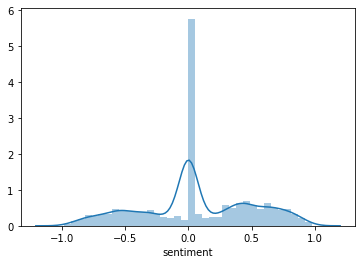

In [15]:
# View the distribution of sentiment in the dataset

sns.distplot(tweets["sentiment"])

Many of the tweets have neutral or mild sentiment, and aren't really interesting from a sentiment perspective.

#### Learner challenge: categorise the tweets based on their sentiment

In [16]:
# Add a positive/negative/neutral label to each tweet

def get_sentiment_type(score):
    if score >= 0.3:
        return "positive"
    elif score <= -0.3:
        return "negative"
    else:
        return "neutral"

tweets["sentiment_type"] = tweets["sentiment"].apply(get_sentiment_type)

In [17]:
tweets[["raw_text", "sentiment", "sentiment_type"]].sample()

,raw_text,sentiment,sentiment_type
1152,@9to5mac @Lorenz_Keller @ChanceHMiller Greed was never good. When an iPhone cost more than a MacBook then you know they have lost the plot. I would never buy such an expensive device as much as I love @apple products and loyal customer. $700 for an iPhone is starting to be painful for most normal customers.,-0.2514,neutral


# Exploring word frequency

### Preprocessing

We'll preserve the `raw_text` column exactly as it is, in case we want to come back to it later.

In [18]:
# Create a new text column

tweets["clean_text"] = tweets["raw_text"]

In [19]:
# Drop the clean column to lowercase

tweets["clean_text"] = tweets["clean_text"].str.lower()

In [20]:
# Remove the mentions and hashtags using regular expressions

tweets["clean_text"] = tweets["clean_text"].replace(r"[@#]\w+", " ", regex=True)

#### Learner challenge: research a regex to remove URLs

The URL regex can be found [here](http://urlregex.com/); you don't have to know how to write it.

expand notes - emphasise the idea of research, not creation

In [21]:
# Remove the urls

url_regex = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"

tweets["clean_text"] = tweets["clean_text"].replace(url_regex, " ", regex=True)

In [22]:
# Remove all non-letter characters

tweets["clean_text"] = tweets["clean_text"].replace(r"[^a-z ]", " ", regex=True)

# Collapse extra spaces

tweets["clean_text"] = tweets["clean_text"].replace(r" +", " ", regex=True)

In [23]:
tweets[["raw_text", "clean_text"]].sample()

,raw_text,clean_text
1516,@hello_hugo @Apple Lol hell my whole apartment is Apple I would never buy a Samsung enless I am on my death bed lol,lol hell my whole apartment is apple i would never buy a samsung enless i am on my death bed lol


### Tokenisation

Splitting the text into individual words - tokens - lets us process the text in a new way.

In [24]:
# Create a tokens column

tweets["tokens"] = tweets["clean_text"].apply(word_tokenize)

In [25]:
tweets["tokens"].sample(3)

6803                                                                                                                                                          [your, favourite, song]
5764                                                                                                                                                      [yeah, i, thought, it, was]
1608    [apple, rushes, to, fix, facetime, eavesdropping, bug, discovery, of, the, flaw, coincided, with, national, privacy, day, in, the, us, a, day, heralded, by, boss, tim, cook]
Name: tokens, dtype: object

### Removing stopwords

"Stopwords" are small functional words - like "the" or "of" - that don't add much to our analysis.

In [36]:
# Get a list of stopwords

stops = stopwords.words("english")

# Add words that are not interesting in this context

stops.extend(["apple", "aapl", "phone", "iphone"])

In [37]:
# Filter each tweet, removing stopwords

def stop_remove(word_list):
    return [word for word in word_list if word not in stops]

tweets["tokens"] = tweets["tokens"].apply(stop_remove)

#### Learner challenge (optional): remove all words with under three characters

In [38]:
# Remove all words with fewer than 3 characters

def short_remove(word_list):
    return [word for word in word_list if len(word) > 2]

tweets["tokens"] = tweets["tokens"].apply(short_remove)

In [39]:
tweets["tokens"].sample(3)

7496                                                                                                                                        [warm, welcome, latest, affiliate, member]
4044    [yes, affectionate, words, man, truly, identify, iloveu, limited, time, supplies, last, trust, never, last, long, warning, product, wear, within, weeks, initially, obtaining]
6334                                                                                                                                                               [new, samsung, yes]
Name: tokens, dtype: object

## Calculating frequency

In [61]:
# Select the data we want to analyse

data = tweets["tokens"][tweets["sentiment_type"] == "positive"]

# We could subset here into just positive tweets, or only those by verified users, etc.

In [62]:
# Join all the tokens together into a list of lists

token_col = data.to_list()

# Flatten the list into a single list of tokens

tokens = list(flatten(token_col))

In [63]:
# Count how many times each token appears

token_counts = Counter(tokens)

### Visualise the top 20 words

#### Learner challenge: select only the 20 most frequent terms

In [64]:
# Get the top 20 terms

top_twenty = pd.Series(token_counts).sort_values(ascending=False)[:20]

#### Learner challenge: create a barplot of terms & frequencies

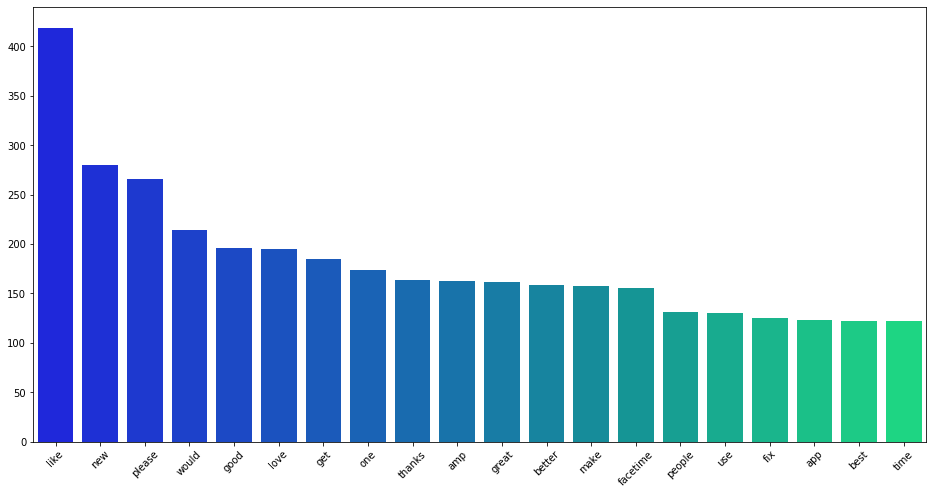

In [65]:
# Plot them as a barplot
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.barplot(x=top_twenty.index, y=top_twenty, palette="winter")


#### Learner challenge (advanced): create a wordcloud

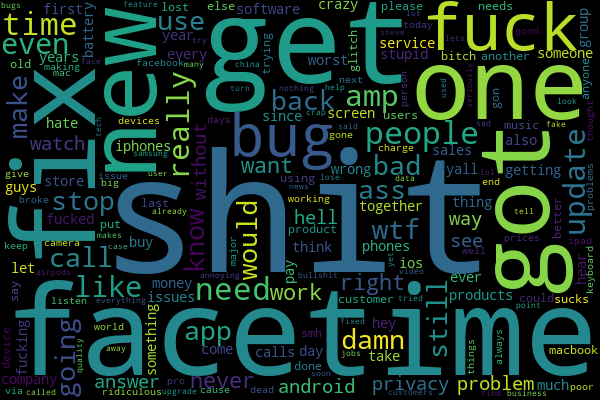

In [60]:
# Build a wordcloud object

fog_machine = WordCloud(width=600, height=400)

fog_machine.generate_from_frequencies(token_counts)

fog_machine.to_image()